### AFL Teams and Players Performance Analysis-Season 2012-2018

#### About Data

This .csv file is downloaded from [kaggle](https://www.kaggle.com/stoney71/aflstats) website.There are million different things that can be done with this dataset.At this stage main focus is on different teams and player's performance analysis.And also to find some interesting correlation between variables.Hoping to use this dataset for machine learning and predictions in the future.

The data contains over 60K rows and 1,240 individual players from season 2012 to 2018.22 Key player stats per game,Match result, winning margin & location.


#### Table of contents
1. Load Data
2. Inspect Data
3. Clean & Prepare Data
4. Exploratory Data Analysis
5. Summary
6. Future Work 

#### 1. Load Data

In [1]:
#Load Libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import datetime

df=pd.read_csv('https://raw.githubusercontent.com/thushara-lakshmanan/python-intro/master/data/Australian_Football_League_Database.csv'
               ,parse_dates=['D.O.B','Date'],low_memory=False)
df.head()

,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,Margin,WinLoss,Opposition,Venue,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebound50s,Inside50s,Clearances,Clangers,FreesFor,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed
0,Adelaide,"Atkins, Rory",1994-07-12,186,85,Midfield,2018,R1,2018-03-23,87.0,-12.0,L,Essendon,Docklands,14,8,1,6,0,2,0,2,2,4,1,1,1,0,0,4,9,0,0,0,0,1,86
1,Adelaide,"Betts, Eddie",1986-11-26,174,74,Forward,2018,R1,2018-03-23,87.0,-12.0,L,Essendon,Docklands,14,7,2,7,0,2,0,2,0,1,1,1,1,0,0,6,9,0,1,3,0,1,85
2,Adelaide,"Brown, Luke",1992-09-22,181,81,Defender,2018,R1,2018-03-23,87.0,-12.0,L,Essendon,Docklands,15,10,2,5,0,0,0,0,5,1,0,0,0,0,0,1,10,0,0,2,0,0,82
3,Adelaide,"Crouch, Matt",1995-04-21,182,80,Midfield,2018,R1,2018-03-23,87.0,-12.0,L,Essendon,Docklands,41,18,6,23,0,0,0,2,3,3,7,4,0,1,0,11,31,0,0,0,0,1,80
4,Adelaide,"Doedee, Tom",1997-03-01,188,88,Defender,2018,R1,2018-03-23,87.0,-12.0,L,Essendon,Docklands,21,7,7,14,0,0,0,2,4,1,0,2,2,0,0,8,14,0,0,9,1,0,93


#### 2. Inspect Data

In [2]:
df.shape

(63712, 37)

In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63712 entries, 0 to 63711
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Team                    63712 non-null  object        
 1   Player                  63712 non-null  object        
 2   D.O.B                   63712 non-null  datetime64[ns]
 3   Height                  63712 non-null  int64         
 4   Weight                  63712 non-null  int64         
 5   Position                63712 non-null  object        
 6   Season                  63712 non-null  int64         
 7   Round                   63712 non-null  object        
 8   Date                    63624 non-null  datetime64[ns]
 9   Score                   63624 non-null  float64       
 10  Margin                  63624 non-null  float64       
 11  WinLoss                 63624 non-null  object        
 12  Opposition              63624 non-null  object

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,63712.0,187.756796,7.196269,167.0,183.0,187.0,193.0,211.0
Weight,63712.0,88.082685,8.080840,67.0,82.0,86.0,93.0,118.0
Season,63712.0,2015.000000,2.000706,2012.0,2013.0,2015.0,2017.0,2018.0
Score,63624.0,88.365837,27.656656,17.0,69.0,86.0,106.0,193.0
Margin,63624.0,0.000000,45.861447,-162.0,-30.0,0.0,30.0,162.0
Disposals,63712.0,16.709788,7.199958,0.0,11.0,16.0,21.0,54.0
Kicks,63712.0,9.422934,4.561949,0.0,6.0,9.0,12.0,36.0
Marks,63712.0,4.068245,2.546491,0.0,2.0,4.0,6.0,21.0
Handballs,63712.0,7.286853,4.361520,0.0,4.0,7.0,10.0,35.0
Goals,63712.0,0.582669,0.983841,0.0,0.0,0.0,1.0,13.0


In [6]:
df.isna().sum()

Team                       0
Player                     0
D.O.B                      0
Height                     0
Weight                     0
Position                   0
Season                     0
Round                      0
Date                      88
Score                     88
Margin                    88
WinLoss                   88
Opposition                88
Venue                     88
Disposals                  0
Kicks                      0
Marks                      0
Handballs                  0
Goals                      0
Behinds                    0
Hitouts                    0
Tackles                    0
Rebound50s                 0
Inside50s                  0
Clearances                 0
Clangers                   0
FreesFor                   0
FreesAgainst               0
BrownlowVotes              0
ContendedPossessions       0
UncontendedPossessions     0
ContestedMarks             0
MarksInside50              0
OnePercenters              0
Bounces       

In [7]:
df[df['Date'].isna()]

,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,Margin,WinLoss,Opposition,Venue,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebound50s,Inside50s,Clearances,Clangers,FreesFor,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed
1936,Collingwood,"Adams, Taylor",1993-09-20,181,83,Midfield,2018,QF,NaT,NaN,NaN,NaN,NaN,NaN,26,18,4,8,2,0,0,7,4,7,6,7,2,2,0,12,18,0,0,4,1,0,73
1937,Collingwood,"Aish, James",1995-11-08,183,80,"Defender, Midfield",2018,QF,NaT,NaN,NaN,NaN,NaN,NaN,21,12,3,9,0,0,0,2,7,1,1,6,3,1,0,12,9,0,0,3,0,0,84
1938,Collingwood,"Cox, Mason",1991-03-14,211,108,Forward,2018,QF,NaT,NaN,NaN,NaN,NaN,NaN,5,4,2,1,0,0,1,0,0,1,0,1,0,1,0,3,2,0,0,7,0,0,88
1939,Collingwood,"Crisp, Jack",1993-10-02,190,91,Defender,2018,QF,NaT,NaN,NaN,NaN,NaN,NaN,21,13,4,8,0,0,0,3,3,3,0,4,0,1,0,8,13,0,0,4,0,2,90
1940,Collingwood,"Goldsack, Tyson",1987-05-22,193,93,Defender,2018,QF,NaT,NaN,NaN,NaN,NaN,NaN,6,1,0,5,0,0,0,1,1,0,0,0,1,0,0,6,0,0,0,9,0,0,86
1941,Collingwood,"Greenwood, Levi",1989-02-19,181,87,Defender,2018,QF,NaT,NaN,NaN,NaN,NaN,NaN,13,10,3,3,0,0,0,0,1,1,0,4,0,1,0,2,11,0,0,4,2,0,65
1942,Collingwood,"Grundy, Brodie",1994-04-15,203,102,Ruck,2018,QF,NaT,NaN,NaN,NaN,NaN,NaN,18,7,2,11,0,0,48,3,0,1,4,2,1,0,0,9,8,0,0,6,0,0,93
1943,Collingwood,"Hoskin-Elliott, Will",1993-09-02,186,81,Forward,2018,QF,NaT,NaN,NaN,NaN,NaN,NaN,15,10,6,5,0,2,0,4,2,0,0,0,2,0,0,7,10,0,1,3,0,0,75
1944,Collingwood,"Howe, Jeremy",1990-06-29,190,88,Defender,2018,QF,NaT,NaN,NaN,NaN,NaN,NaN,16,10,6,6,0,0,0,2,1,0,0,4,0,0,0,6,9,2,0,15,0,0,98
1945,Collingwood,"Langdon, Tom",1994-06-09,190,83,Defender,2018,QF,NaT,NaN,NaN,NaN,NaN,NaN,12,3,2,9,0,0,0,3,2,0,0,2,1,2,0,6,7,0,0,10,0,0,91


In [8]:
df['Team'].unique()

array(['Adelaide', 'Brisbane Lions', 'Carlton', 'Collingwood', 'Essendon',
       'Fremantle', 'Geelong', 'Gold Coast', 'Greater Western Sydney',
       'Hawthorn', 'Melbourne', 'North Melbourne', 'Port Adelaide',
       'Richmond', 'St Kilda', 'Sydney', 'West Coast', 'Western Bulldogs'],
      dtype=object)

In [9]:
df['Round'].unique()

array(['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11',
       'R12', 'R13', 'R15', 'R16', 'R17', 'R18', 'R19', 'R20', 'R21',
       'R22', 'R23', 'R14', 'QF', 'SF', 'PF', 'GF', 'EF'], dtype=object)

In [10]:
df['Season'].unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012], dtype=int64)

Let's check for which round and season values are missing

In [11]:
df[df['Date'].isna()]['Round'].unique()

array(['QF', 'EF'], dtype=object)

In [12]:
df[df['Date'].isna()]['Season'].unique()

array([2018], dtype=int64)

Now check which are the team and opponent in 2018 Qualifying and Elimination Final.

In [13]:
df[(df['Round']=='QF')&(df['Season']==2018)]['Team'].unique()

array(['Collingwood', 'Hawthorn', 'Richmond', 'West Coast'], dtype=object)

In [14]:
df[(df['Round']=='QF')&(df['Season']==2018)]['Opposition'].unique()

array([nan, 'Richmond', 'Hawthorn'], dtype=object)

In [15]:
df[(df['Round']=='EF')&(df['Season']==2018)]['Team'].unique()

array(['Geelong', 'Greater Western Sydney', 'Melbourne', 'Sydney'],
      dtype=object)

In [16]:
df[(df['Round']=='EF')&(df['Season']==2018)]['Opposition'].unique()

array([nan, 'Sydney', 'Greater Western Sydney'], dtype=object)

In [17]:
df['Position'].unique()

array(['Midfield', 'Forward', 'Defender', 'Midfield, Forward', 'Ruck',
       'Defender, Forward', 'Forward, Ruck', 'Defender, Midfield',
       'Midfield, Ruck'], dtype=object)

##### 2.1. Findings, Inconsistencies or Issues
1. There are few missing values for Date,Score,Margin,WinLoss,Opposition and Venue column and it is from 2018-Qualifying Final(QF) and Elimination Final(EF).
2. The Date column contains NaN and NaT values.
3. The missing values are for 2018- West Coast & Collingwood Qualifying Final.
4. Also, values are missing for 2018 - Melbourne & Geelong Elimination Final.
5. As there is already Season column, Date Column can be removed. 
6. D.O.B column is not much useful,so find age from that column.


#### 3. Clean & Prepare Data

In [18]:
# Let's normalise the columns
df.columns = [col.lower() for col in df.columns]

##### 3.1 Deal with missing values
First, create a mask to filter data for Collingwood and West coast in 2018-QF.Then select each column with missing value and assign appropriate value.
The game was held at Perth Optus stadium on 8/9/2018 and west coast won the match.(https://en.wikipedia.org/wiki/2018_AFL_finals_series)

In [19]:
#Create mask
filter_QF1=((df['round']=='QF')&(df['season']==2018)&(df['team']=='Collingwood'))
filter_QF2=((df['round']=='QF')&(df['season']==2018)&(df['team']=='West Coast'))

In [20]:
df.loc[filter_QF1,'venue']='Perth Stadium'
df.loc[filter_QF2,'venue']='Perth Stadium'

In [21]:
df.loc[filter_QF1,'winloss']='L'
df.loc[filter_QF2,'winloss']='W'

In [22]:
df.loc[filter_QF1,'opposition']='West Coast'
df.loc[filter_QF2,'opposition']='Collingwood'

In [23]:
#convert to datetime and assign
df.loc[filter_QF1,'date']=pd.to_datetime('2018-09-08')
df.loc[filter_QF2,'date']=pd.to_datetime('2018-09-08')

In [24]:
score_collingwood=70
df.loc[filter_QF1,'score']=score_collingwood

In [25]:
score_WestCoast=86
df.loc[filter_QF2,'score']=score_WestCoast

In [26]:
#calculate margin
margin_cal=score_WestCoast-score_collingwood
df.loc[filter_QF1,'margin']=-margin_cal
df.loc[filter_QF2,'margin']=margin_cal

In [27]:
df[filter_QF1]

,team,player,d.o.b,height,weight,position,season,round,date,score,margin,winloss,opposition,venue,disposals,kicks,marks,handballs,goals,behinds,hitouts,tackles,rebound50s,inside50s,clearances,clangers,freesfor,freesagainst,brownlowvotes,contendedpossessions,uncontendedpossessions,contestedmarks,marksinside50,onepercenters,bounces,goalassists,percentplayed
1936,Collingwood,"Adams, Taylor",1993-09-20,181,83,Midfield,2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,26,18,4,8,2,0,0,7,4,7,6,7,2,2,0,12,18,0,0,4,1,0,73
1937,Collingwood,"Aish, James",1995-11-08,183,80,"Defender, Midfield",2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,21,12,3,9,0,0,0,2,7,1,1,6,3,1,0,12,9,0,0,3,0,0,84
1938,Collingwood,"Cox, Mason",1991-03-14,211,108,Forward,2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,5,4,2,1,0,0,1,0,0,1,0,1,0,1,0,3,2,0,0,7,0,0,88
1939,Collingwood,"Crisp, Jack",1993-10-02,190,91,Defender,2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,21,13,4,8,0,0,0,3,3,3,0,4,0,1,0,8,13,0,0,4,0,2,90
1940,Collingwood,"Goldsack, Tyson",1987-05-22,193,93,Defender,2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,6,1,0,5,0,0,0,1,1,0,0,0,1,0,0,6,0,0,0,9,0,0,86
1941,Collingwood,"Greenwood, Levi",1989-02-19,181,87,Defender,2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,13,10,3,3,0,0,0,0,1,1,0,4,0,1,0,2,11,0,0,4,2,0,65
1942,Collingwood,"Grundy, Brodie",1994-04-15,203,102,Ruck,2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,18,7,2,11,0,0,48,3,0,1,4,2,1,0,0,9,8,0,0,6,0,0,93
1943,Collingwood,"Hoskin-Elliott, Will",1993-09-02,186,81,Forward,2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,15,10,6,5,0,2,0,4,2,0,0,0,2,0,0,7,10,0,1,3,0,0,75
1944,Collingwood,"Howe, Jeremy",1990-06-29,190,88,Defender,2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,16,10,6,6,0,0,0,2,1,0,0,4,0,0,0,6,9,2,0,15,0,0,98
1945,Collingwood,"Langdon, Tom",1994-06-09,190,83,Defender,2018,QF,2018-09-08,70.0,-16.0,L,West Coast,Perth Stadium,12,3,2,9,0,0,0,3,2,0,0,2,1,2,0,6,7,0,0,10,0,0,91


In [28]:
df[filter_QF2]

,team,player,d.o.b,height,weight,position,season,round,date,score,margin,winloss,opposition,venue,disposals,kicks,marks,handballs,goals,behinds,hitouts,tackles,rebound50s,inside50s,clearances,clangers,freesfor,freesagainst,brownlowvotes,contendedpossessions,uncontendedpossessions,contestedmarks,marksinside50,onepercenters,bounces,goalassists,percentplayed
8558,West Coast,"Barrass, Tom",1995-10-08,194,95,Defender,2018,QF,2018-09-08,86.0,16.0,W,Collingwood,Perth Stadium,8,6,3,2,0,0,0,0,3,0,0,1,1,0,0,3,5,1,0,13,0,0,92
8559,West Coast,"Cole, Tom",1997-05-28,186,81,Defender,2018,QF,2018-09-08,86.0,16.0,W,Collingwood,Perth Stadium,5,3,0,2,0,0,0,1,0,0,1,1,1,1,0,6,0,0,0,3,0,0,92
8560,West Coast,"Cripps, Jamie",1992-04-23,183,84,Forward,2018,QF,2018-09-08,86.0,16.0,W,Collingwood,Perth Stadium,16,11,4,5,1,0,0,1,1,5,0,3,0,1,0,4,13,0,0,0,0,0,93
8561,West Coast,"Darling, Jack",1992-06-13,191,95,Forward,2018,QF,2018-09-08,86.0,16.0,W,Collingwood,Perth Stadium,13,9,5,4,2,1,0,1,0,2,0,1,3,0,0,10,4,3,2,2,0,2,96
8562,West Coast,"Duggan, Liam",1996-12-11,184,83,Defender,2018,QF,2018-09-08,86.0,16.0,W,Collingwood,Perth Stadium,15,15,6,0,0,0,0,4,4,1,2,3,0,1,0,4,10,0,0,2,0,0,81
8563,West Coast,"Hurn, Shannon",1987-09-04,187,95,Defender,2018,QF,2018-09-08,86.0,16.0,W,Collingwood,Perth Stadium,17,15,9,2,0,0,0,0,6,0,0,1,0,0,0,4,11,2,0,2,0,0,90
8564,West Coast,"Hutchings, Mark",1991-05-25,182,83,Midfield,2018,QF,2018-09-08,86.0,16.0,W,Collingwood,Perth Stadium,15,8,3,7,0,0,0,0,2,0,1,5,0,4,0,7,10,0,0,0,0,0,87
8565,West Coast,"Jetta, Lewis",1989-05-04,182,80,Defender,2018,QF,2018-09-08,86.0,16.0,W,Collingwood,Perth Stadium,20,14,4,6,1,0,0,4,5,2,1,2,2,0,0,7,11,0,0,5,0,0,86
8566,West Coast,"Kennedy, Josh J",1987-08-25,196,102,Forward,2018,QF,2018-09-08,86.0,16.0,W,Collingwood,Perth Stadium,12,9,6,3,2,4,0,3,0,3,0,3,0,1,0,7,6,3,4,2,0,0,86
8567,West Coast,"LeCras, Mark",1986-08-30,184,82,Forward,2018,QF,2018-09-08,86.0,16.0,W,Collingwood,Perth Stadium,15,11,1,4,0,2,0,2,2,2,3,1,0,0,0,7,8,0,0,0,0,2,90


Now create a mask to filter data for 2018 - Melbourne & Geelong Elimination Final.The game was held at M.C.G. on 7/9/2018 and Melbourne won the match.(https://en.wikipedia.org/wiki/2018_AFL_finals_series)

In [29]:
#Create mask
filter_EF1=((df['round']=='EF')&(df['season']==2018)&(df['team']=='Melbourne'))
filter_EF2=((df['round']=='EF')&(df['season']==2018)&(df['team']=='Geelong'))

In [30]:
df.loc[filter_EF1,'venue']='M.C.G.'
df.loc[filter_EF2,'venue']='M.C.G.'

In [31]:
df.loc[filter_EF1,'winloss']='W'
df.loc[filter_EF2,'winloss']='L'

In [32]:
df.loc[filter_EF1,'opposition']='Geelong'
df.loc[filter_EF2,'opposition']='Melbourne'

In [33]:
df.loc[filter_EF1,'date']=pd.to_datetime('2018-09-07')
df.loc[filter_EF2,'date']=pd.to_datetime('2018-09-07')

In [34]:
score_Melbourne=75
df.loc[filter_EF1,'score']=score_Melbourne

In [35]:
score_Geelong=46
df.loc[filter_EF2,'score']=score_Geelong

In [36]:
#calculate margin
margin_cal=score_Melbourne-score_Geelong
df.loc[filter_EF1,'margin']=margin_cal
df.loc[filter_EF2,'margin']=-margin_cal

In [37]:
df[filter_EF1]

,team,player,d.o.b,height,weight,position,season,round,date,score,margin,winloss,opposition,venue,disposals,kicks,marks,handballs,goals,behinds,hitouts,tackles,rebound50s,inside50s,clearances,clangers,freesfor,freesagainst,brownlowvotes,contendedpossessions,uncontendedpossessions,contestedmarks,marksinside50,onepercenters,bounces,goalassists,percentplayed
5522,Melbourne,"Brayshaw, Angus",1996-01-09,187,87,Midfield,2018,EF,2018-09-07,75.0,29.0,W,Geelong,M.C.G.,26,10,4,16,0,0,0,5,1,5,4,8,0,0,0,14,12,1,0,3,2,0,71
5523,Melbourne,"Fritsch, Bayley",1996-12-06,188,81,Midfield,2018,EF,2018-09-07,75.0,29.0,W,Geelong,M.C.G.,12,8,3,4,0,0,0,5,3,0,0,0,1,0,0,1,11,0,0,3,0,0,80
5524,Melbourne,"Frost, Sam",1993-08-28,194,95,Defender,2018,EF,2018-09-07,75.0,29.0,W,Geelong,M.C.G.,10,4,3,6,0,0,0,1,3,0,1,3,1,3,0,6,3,1,0,2,0,0,97
5525,Melbourne,"Gawn, Max",1991-12-30,208,109,Ruck,2018,EF,2018-09-07,75.0,29.0,W,Geelong,M.C.G.,11,7,3,4,1,0,42,2,4,1,3,2,1,1,0,4,7,2,1,5,0,0,83
5526,Melbourne,"Hannan, Mitch",1994-03-09,189,87,Forward,2018,EF,2018-09-07,75.0,29.0,W,Geelong,M.C.G.,14,10,4,4,1,0,0,1,0,4,1,2,0,0,0,7,6,0,0,0,3,0,71
5527,Melbourne,"Harmes, James",1995-10-05,185,86,Midfield,2018,EF,2018-09-07,75.0,29.0,W,Geelong,M.C.G.,26,13,4,13,1,1,0,10,0,7,4,5,0,2,0,10,18,0,1,1,1,1,83
5528,Melbourne,"Hibberd, Michael",1990-01-03,186,93,Defender,2018,EF,2018-09-07,75.0,29.0,W,Geelong,M.C.G.,15,11,5,4,0,0,0,0,6,3,0,1,2,0,0,5,11,0,0,3,0,0,84
5529,Melbourne,"Jetta, Neville",1990-02-12,180,82,Defender,2018,EF,2018-09-07,75.0,29.0,W,Geelong,M.C.G.,7,4,2,3,0,0,0,4,3,1,0,0,3,0,0,5,2,0,0,1,0,0,78
5530,Melbourne,"Jones, Nathan",1988-01-20,180,87,Midfield,2018,EF,2018-09-07,75.0,29.0,W,Geelong,M.C.G.,15,9,2,6,1,1,0,3,0,5,0,3,0,2,0,4,13,0,0,0,1,0,82
5531,Melbourne,"Lewis, Jordan",1986-04-24,186,86,Defender,2018,EF,2018-09-07,75.0,29.0,W,Geelong,M.C.G.,24,14,6,10,0,0,0,0,3,3,0,1,2,1,0,6,16,0,0,4,0,1,89


In [38]:
df[filter_EF2]

,team,player,d.o.b,height,weight,position,season,round,date,score,margin,winloss,opposition,venue,disposals,kicks,marks,handballs,goals,behinds,hitouts,tackles,rebound50s,inside50s,clearances,clangers,freesfor,freesagainst,brownlowvotes,contendedpossessions,uncontendedpossessions,contestedmarks,marksinside50,onepercenters,bounces,goalassists,percentplayed
3476,Geelong,"Abbott, Ryan",1991-06-25,200,100,Ruck,2018,EF,2018-09-07,46.0,-29.0,L,Melbourne,M.C.G.,5,3,2,2,0,1,27,5,0,0,0,3,0,2,0,2,3,1,1,5,0,0,81
3477,Geelong,"Ablett, Gary",1984-05-14,182,87,Midfield,2018,EF,2018-09-07,46.0,-29.0,L,Melbourne,M.C.G.,27,16,6,11,0,1,0,6,8,2,4,6,0,1,0,7,20,1,0,0,0,0,87
3478,Geelong,"Bews, Jed",1993-12-14,186,88,Defender,2018,EF,2018-09-07,46.0,-29.0,L,Melbourne,M.C.G.,15,7,1,8,0,0,0,1,3,0,0,2,0,1,0,7,9,0,0,0,0,1,91
3479,Geelong,"Blicavs, Mark",1991-03-28,198,100,Defender,2018,EF,2018-09-07,46.0,-29.0,L,Melbourne,M.C.G.,13,6,2,7,0,0,4,6,1,0,0,1,2,0,0,5,8,0,0,6,0,0,93
3480,Geelong,"Dangerfield, Patrick",1990-04-05,189,92,"Midfield, Forward",2018,EF,2018-09-07,46.0,-29.0,L,Melbourne,M.C.G.,25,11,4,14,0,1,0,7,0,3,4,12,1,6,0,14,12,1,0,3,0,1,84
3481,Geelong,"Duncan, Mitch",1991-06-10,188,88,Midfield,2018,EF,2018-09-07,46.0,-29.0,L,Melbourne,M.C.G.,21,12,4,9,1,0,0,3,3,4,1,5,1,1,0,7,14,1,0,1,1,0,80
3482,Geelong,"Guthrie, Cameron",1992-08-19,187,86,Defender,2018,EF,2018-09-07,46.0,-29.0,L,Melbourne,M.C.G.,14,7,1,7,0,0,0,4,3,2,4,2,1,1,0,9,4,1,0,1,0,0,66
3483,Geelong,"Hawkins, Tom",1988-07-21,198,103,Forward,2018,EF,2018-09-07,46.0,-29.0,L,Melbourne,M.C.G.,11,7,7,4,2,0,1,2,0,1,0,2,2,2,0,7,5,2,4,1,0,0,100
3484,Geelong,"Henderson, Lachie",1989-12-14,196,98,Defender,2018,EF,2018-09-07,46.0,-29.0,L,Melbourne,M.C.G.,10,5,2,5,0,0,0,1,1,1,0,1,0,0,0,5,5,1,0,6,0,0,87
3485,Geelong,"Henry, Jack",1998-08-29,191,92,Defender,2018,EF,2018-09-07,46.0,-29.0,L,Melbourne,M.C.G.,11,7,1,4,0,0,2,4,2,2,0,3,0,0,0,5,7,0,0,2,0,0,77


In [39]:
df.isna().sum()

team                      0
player                    0
d.o.b                     0
height                    0
weight                    0
position                  0
season                    0
round                     0
date                      0
score                     0
margin                    0
winloss                   0
opposition                0
venue                     0
disposals                 0
kicks                     0
marks                     0
handballs                 0
goals                     0
behinds                   0
hitouts                   0
tackles                   0
rebound50s                0
inside50s                 0
clearances                0
clangers                  0
freesfor                  0
freesagainst              0
brownlowvotes             0
contendedpossessions      0
uncontendedpossessions    0
contestedmarks            0
marksinside50             0
onepercenters             0
bounces                   0
goalassists         

Now all the missing values are replaced.Let's create a new age column from the date and d.o.b column.

In [40]:
df['age']=df['date'].dt.year-df['d.o.b'].dt.year

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63712 entries, 0 to 63711
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   team                    63712 non-null  object        
 1   player                  63712 non-null  object        
 2   d.o.b                   63712 non-null  datetime64[ns]
 3   height                  63712 non-null  int64         
 4   weight                  63712 non-null  int64         
 5   position                63712 non-null  object        
 6   season                  63712 non-null  int64         
 7   round                   63712 non-null  object        
 8   date                    63712 non-null  datetime64[ns]
 9   score                   63712 non-null  float64       
 10  margin                  63712 non-null  float64       
 11  winloss                 63712 non-null  object        
 12  opposition              63712 non-null  object

Create quarter column

In [42]:
import datetime
df['qtr']=df['date'].dt.quarter
mapping = {1:'first_Q',
           2:'second_Q',
           3:'third_Q',
           4:'fourth_Q'}
df['quarter']=df['qtr'].map(mapping)

Drop unwanted columns.

In [43]:
#drop unwanted columns
df.drop(columns=['d.o.b','date'],axis=1,inplace=True)

In [44]:
df.head()

,team,player,height,weight,position,season,round,score,margin,winloss,opposition,venue,disposals,kicks,marks,handballs,goals,behinds,hitouts,tackles,rebound50s,inside50s,clearances,clangers,freesfor,freesagainst,brownlowvotes,contendedpossessions,uncontendedpossessions,contestedmarks,marksinside50,onepercenters,bounces,goalassists,percentplayed,age,qtr,quarter
0,Adelaide,"Atkins, Rory",186,85,Midfield,2018,R1,87.0,-12.0,L,Essendon,Docklands,14,8,1,6,0,2,0,2,2,4,1,1,1,0,0,4,9,0,0,0,0,1,86,24,1,first_Q
1,Adelaide,"Betts, Eddie",174,74,Forward,2018,R1,87.0,-12.0,L,Essendon,Docklands,14,7,2,7,0,2,0,2,0,1,1,1,1,0,0,6,9,0,1,3,0,1,85,32,1,first_Q
2,Adelaide,"Brown, Luke",181,81,Defender,2018,R1,87.0,-12.0,L,Essendon,Docklands,15,10,2,5,0,0,0,0,5,1,0,0,0,0,0,1,10,0,0,2,0,0,82,26,1,first_Q
3,Adelaide,"Crouch, Matt",182,80,Midfield,2018,R1,87.0,-12.0,L,Essendon,Docklands,41,18,6,23,0,0,0,2,3,3,7,4,0,1,0,11,31,0,0,0,0,1,80,23,1,first_Q
4,Adelaide,"Doedee, Tom",188,88,Defender,2018,R1,87.0,-12.0,L,Essendon,Docklands,21,7,7,14,0,0,0,2,4,1,0,2,2,0,0,8,14,0,0,9,1,0,93,21,1,first_Q


Reset index and save the cleaned version of the dataset for later use.

In [45]:
df_ready = df.reset_index(drop=True).copy()

In [46]:
df_ready.to_csv('AFL_Ready.csv', index=False)

##### Cleaning Summary
Data was already in such good condition ,except few values were missing.
1. The missing values were for Collingwood and West coast game in 2018-QF.The game was held at Perth Optus stadium on 8/9/2018 and west coast won the match as per(https://en.wikipedia.org/wiki/2018_AFL_finals_series) . After filtering the data, values are assigned for appropriate columns.
2. Also, few columns were missing for 2018 - Melbourne & Geelong Elimination Final.The game was held at M.C.G. on 7/9/2018 and Melbourne won the match.After filtering the data, values are assigned for approriate columns.
3. The new age column is created from the date and d.o.b column.
4. A new quarter column is created.
5. Date and D.o.b columns are deleted.


#### 4. Exploratory Data Analysis

In [3]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)
df=pd.read_csv('AFL_Ready.csv')
df.head()

,team,player,height,weight,position,season,round,score,margin,winloss,opposition,venue,disposals,kicks,marks,handballs,goals,behinds,hitouts,tackles,rebound50s,inside50s,clearances,clangers,freesfor,freesagainst,brownlowvotes,contendedpossessions,uncontendedpossessions,contestedmarks,marksinside50,onepercenters,bounces,goalassists,percentplayed,age,qtr,quarter
0,Adelaide,"Atkins, Rory",186,85,Midfield,2018,R1,87.0,-12.0,L,Essendon,Docklands,14,8,1,6,0,2,0,2,2,4,1,1,1,0,0,4,9,0,0,0,0,1,86,24,1,first_Q
1,Adelaide,"Betts, Eddie",174,74,Forward,2018,R1,87.0,-12.0,L,Essendon,Docklands,14,7,2,7,0,2,0,2,0,1,1,1,1,0,0,6,9,0,1,3,0,1,85,32,1,first_Q
2,Adelaide,"Brown, Luke",181,81,Defender,2018,R1,87.0,-12.0,L,Essendon,Docklands,15,10,2,5,0,0,0,0,5,1,0,0,0,0,0,1,10,0,0,2,0,0,82,26,1,first_Q
3,Adelaide,"Crouch, Matt",182,80,Midfield,2018,R1,87.0,-12.0,L,Essendon,Docklands,41,18,6,23,0,0,0,2,3,3,7,4,0,1,0,11,31,0,0,0,0,1,80,23,1,first_Q
4,Adelaide,"Doedee, Tom",188,88,Defender,2018,R1,87.0,-12.0,L,Essendon,Docklands,21,7,7,14,0,0,0,2,4,1,0,2,2,0,0,8,14,0,0,9,1,0,93,21,1,first_Q


#### 4.1 By Team

Fig 1:Let's examine the score distribution.Scores are almost equally distributed(slightly skewed to right).

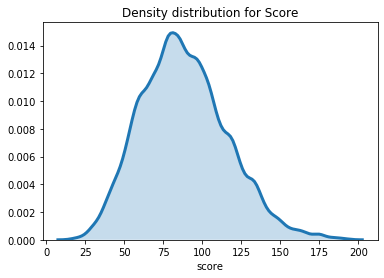

In [4]:
sns.distplot(df['score'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.title("Density distribution for Score")
plt.savefig('mini6_fig1.png', dpi=500)
plt.show()

Fig 2: Let's check who won the grand final most of the time?
- Hawthorn won grand final thrice during the season 2012 to 2018.

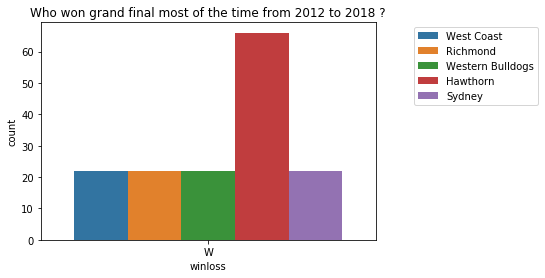

In [5]:
df_GF=df[(df['round']=='GF')&(df['winloss']=='W')]
sns.countplot(x='winloss',hue='team',data=df_GF)
plt.title("Who won grand final most of the time from 2012 to 2018 ?")
plt.legend(bbox_to_anchor=(1.5,1))
plt.savefig('mini6_fig2.png', dpi=500)
plt.show()

Fig 3: Below graph shows which team won the match most of the time during the  season 2012 to 2018?
- Hawthorn won game most of the time followed by Sydney,Geelong,West coast and Adelaide

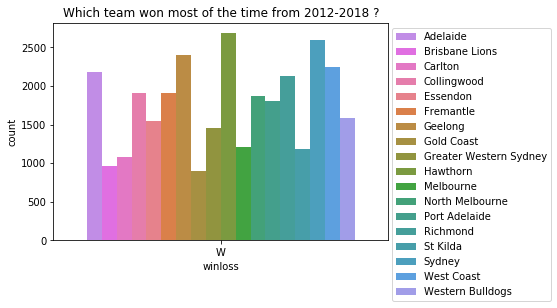

In [6]:
df_win=df[df['winloss']=='W']
#husl-palette - Get a set of evenly spaced colors in HUSL hue space
palette_18=sns.husl_palette(18,h=.8)
sns.countplot(x='winloss',hue='team',data=df_win,palette=palette_18, saturation=0.75)
plt.title("Which team won most of the time from 2012-2018 ?")
plt.legend(bbox_to_anchor=(1.5,1))
plt.savefig('mini6_fig3.png', dpi=500)
plt.show()

Fig 4: Let's check the distribution of scores in the different teams using box plot.

In a box plot, top and bottom lines are the max and min values.The top and bottom of the box are the 75th and 25th percentiles respectively.The middle line is the median of the distribution.Any point above the max and min of the distribution is an outlier.
 From the plot we can see that:
- The teams that scored lowest most of the times are Brisbane Lions,Gold Coast and Fremantle(note:Richmond got outlier,they might have a low score in one game or so.)
- The teams that sit on lists of highest scores are Adelaide,West Coast and Sydney(note:Hawthorn,Geelong and Richmond got few outliers)
- Hawthorn,Geelong and Adelaide always scored well in the game they played from season 2012-2018.


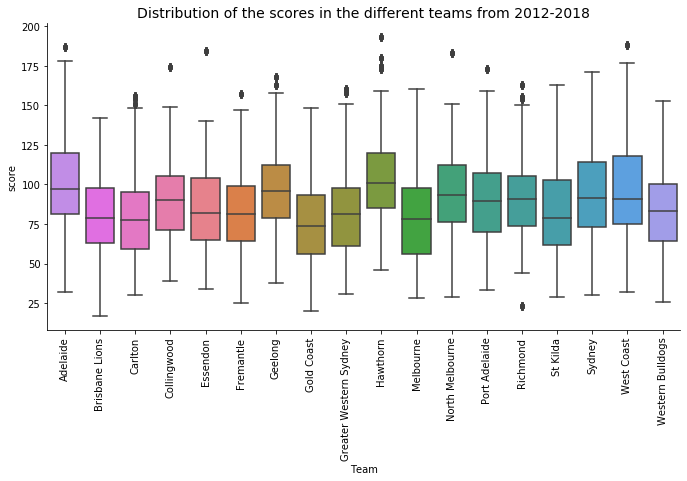

In [8]:
sns.catplot(x='team',y='score',data=df, kind='box',height=5,aspect=2,palette=palette_18)
plt.xticks(rotation=90)
plt.xlabel("Team")
plt.title("Distribution of the scores in the different teams from 2012-2018",fontdict={'fontsize':14})
plt.savefig('mini6_fig4.png', dpi=500)
plt.show()

Pivot table 1:Let's group by team and find average score of each team in season 2012 - 2018

In [9]:
df_team_avg=pd.pivot_table(df,
                                index=['team'],
                                values='score')

df_team_avg

,score
team,
Adelaide,101.233129
Brisbane Lions,80.435065
Carlton,78.929487
Collingwood,89.641975
Essendon,85.160256
Fremantle,81.699387
Geelong,95.921212
Gold Coast,76.746753
Greater Western Sydney,82.962733


Pivot table2: Using the below pivot table we are going to group the dataset by team and opposition as column and will find the average score .

In [10]:
df_team_opponent=pd.pivot_table(df,
                                index='team',
                                columns='opposition',
                                values='score')

df_team_opponent

opposition,Adelaide,Brisbane Lions,Carlton,Collingwood,Essendon,Fremantle,Geelong,Gold Coast,Greater Western Sydney,Hawthorn,Melbourne,North Melbourne,Port Adelaide,Richmond,St Kilda,Sydney,West Coast,Western Bulldogs
team,,,,,,,,,,,,,,,,,,
Adelaide,NaN,121.500000,108.500000,81.875000,119.375000,89.090909,90.181818,129.555556,121.181818,82.800000,94.555556,104.181818,106.142857,93.000000,118.250000,76.333333,97.900000,91.111111
Brisbane Lions,66.875000,NaN,93.300000,80.250000,82.125000,62.875000,74.200000,93.857143,85.000000,87.125000,88.888889,75.000000,76.888889,63.666667,89.857143,62.142857,76.777778,94.454545
Carlton,74.500000,93.200000,NaN,78.461538,82.416667,64.625000,79.500000,84.222222,80.000000,65.250000,79.750000,77.142857,77.888889,89.416667,89.727273,64.300000,77.000000,72.750000
Collingwood,83.000000,106.875000,88.846154,NaN,89.076923,87.875000,86.800000,107.714286,105.750000,89.333333,93.300000,101.000000,72.888889,86.545455,102.714286,74.666667,77.307692,87.750000
Essendon,88.125000,98.000000,85.416667,79.769231,NaN,79.888889,69.375000,92.875000,97.875000,82.444444,86.857143,89.700000,103.666667,73.846154,87.777778,70.888889,82.250000,88.500000
Fremantle,71.909091,90.000000,88.625000,80.000000,95.555556,NaN,76.545455,87.500000,95.000000,67.600000,101.300000,85.555556,79.083333,69.818182,78.125000,67.500000,80.285714,86.875000
Geelong,93.181818,117.500000,103.250000,80.200000,96.625000,88.000000,NaN,118.250000,98.222222,92.062500,103.555556,98.636364,96.777778,80.111111,115.571429,79.307692,92.571429,95.333333
Gold Coast,74.444444,88.142857,80.333333,67.857143,80.500000,74.000000,78.625000,NaN,87.454545,71.777778,80.700000,89.000000,55.111111,69.857143,83.200000,60.750000,74.666667,71.500000
Greater Western Sydney,76.363636,100.375000,101.500000,76.625000,83.000000,76.000000,69.333333,107.454545,NaN,90.428571,84.545455,70.625000,93.777778,66.800000,81.333333,72.750000,77.000000,90.500000


Fig 5:Below heat map shows the average score of each team against the opponent.The diagonals are all white because those squares are correlating each team to itself.For larger scores, colours are getting lighter.
- Hawthorn got lighter colours and their average score is above 100 with 12 opponents.Hawthorn's lowest average score is with Richmond.
- The teams that never had an average score above 100 during season 2012-2018 are Brisbase Lions,Carlton and Gold Coast.
- Geelong,Hawthorn and Sydney are strong opponents(no team scored average score above 95 against them).

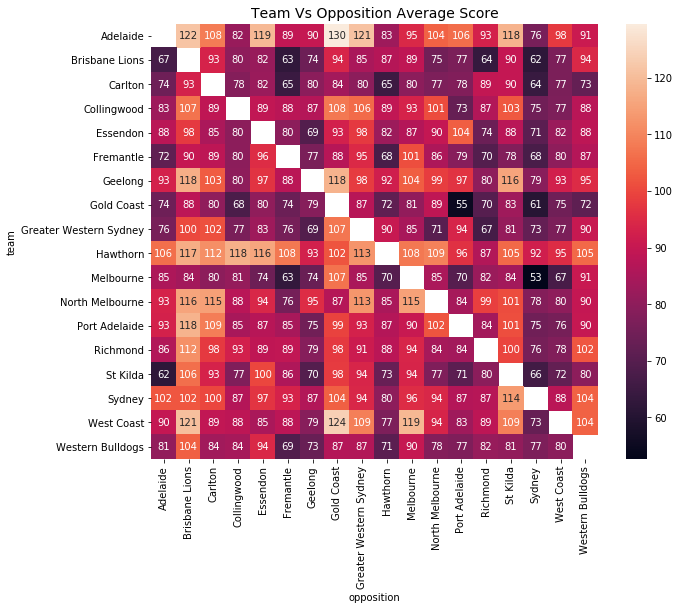

In [11]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(data=df_team_opponent,annot=True,annot_kws={"size": 10},fmt=".0f")
plt.title("Team Vs Opposition Average Score",fontdict={'fontsize':14})
plt.savefig('mini6_fig5.png', dpi=500)
plt.show()

Pivot table3:Also find average score by team and year

In [12]:
df_team_year_avg=pd.pivot_table(df,
                                index=['team','season'],
                                values='score')

df_team_year_avg

score
team             season            
Adelaide         2012    105.720000
                 2013     93.818182
                 2014     98.863636
                 2015     99.000000
                 2016    112.750000
...                             ...
Western Bulldogs 2014     81.090909
                 2015     95.782609
                 2016     86.192308
                 2017     84.409091
                 2018     71.590909

[126 rows x 1 columns]

Let's plot how many times a team won, lost, or drew the games they played.First do the below grouping by team,season,round & winloss,it will give the game level count .Then group again to get team level summary.

In [14]:
gp1=df.groupby(['team','season','round','winloss'])['winloss'].size().reset_index(name='counts')
group_game=gp1.groupby(['team','winloss'])['winloss'].size().reset_index(name='winlosscount')
group_game

,team,winloss,winlosscount
0,Adelaide,D,1
1,Adelaide,L,63
2,Adelaide,W,99
3,Brisbane Lions,L,110
4,Brisbane Lions,W,44
5,Carlton,D,1
6,Carlton,L,106
7,Carlton,W,49
8,Collingwood,D,1
9,Collingwood,L,74


Fig 6:In below graph we can see total win/loss/draw by a team during season 2012-2018
- We can see Brisbane Lions,Carlton and Gold coast lost more times than win.
- Hawthorn,Sydney and Geelong got more wins and less loss.
- Greater Western Sydney is the one who got more draw in the games they played.


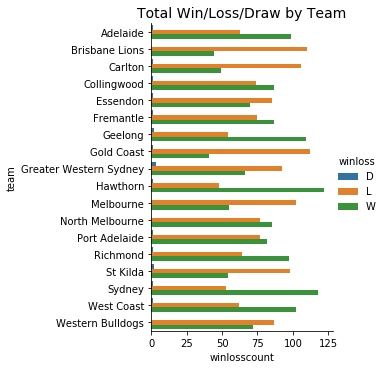

In [15]:
sns.catplot(x='winlosscount', 
            y='team', 
            data=group_game, 
            kind='bar',
            hue='winloss')
plt.title('Total Win/Loss/Draw by Team',fontdict={'fontsize':14})
plt.savefig('mini6_fig6.png', dpi=500)
plt.show()

Fig 7:Let's see the score distribution by the team in a different quarter.

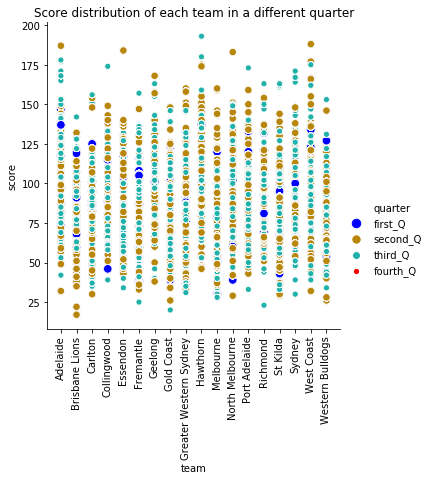

In [19]:
palette_colors = {'first_Q': "blue", 'second_Q': "darkgoldenrod",'third_Q': "lightseagreen",'fourth_Q': "red"}
sns.relplot(x='team', 
            y='score', 
            data=df, 
            kind='scatter',
            hue='quarter',
            size='quarter',palette=palette_colors)
plt.title('Score distribution of each team in a different quarter')
plt.xticks(rotation=90)
plt.savefig('mini6_fig7.png', dpi=500)
plt.show()

#### 4.2 By Player

Fig 8:First examine the distribution of few variables using the histogram.Let's plot player's age,height,weight,goals,behinds and disposals.

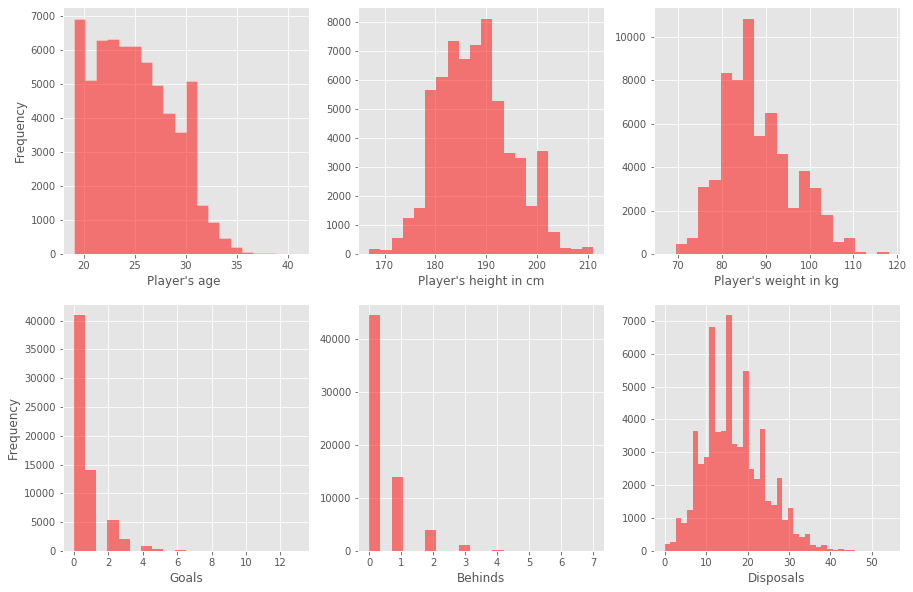

In [20]:
plt.style.use('ggplot')
fig,ax=plt.subplots(2,3,figsize=(15, 10))

ax[0,0].hist(df['age'],bins=20,histtype='stepfilled',alpha=0.5,edgecolor='white',color='red')
ax[0,1].hist(df['height'],bins=20,histtype='stepfilled',alpha=0.5,color='red')
ax[0,2].hist(df['weight'],bins=20,histtype='stepfilled',alpha=0.5,color='red')
ax[1,0].hist(df['goals'],bins=20,histtype='stepfilled',alpha=0.5,color='red')
ax[1,1].hist(df['behinds'],bins=20,histtype='stepfilled',alpha=0.5,color='red')
ax[1,2].hist(df['disposals'],bins=40,histtype='stepfilled',alpha=0.5,color='red')
ax[0,0].set(xlabel="Player's age ",ylabel='Frequency')
ax[0,1].set(xlabel="Player's height in cm")
ax[0,2].set(xlabel="Player's weight in kg")
ax[1,0].set(xlabel='Goals',ylabel='Frequency')
ax[1,1].set(xlabel='Behinds')
ax[1,2].set(xlabel='Disposals')
plt.savefig('mini6_fig8.png', dpi=500)
plt.show()

- In the above histogram player's age resembles normal distribution(slightly skewed to right.)-approximate values between 19-38
- player's height looks like normally distributed.More player's in 180-190cm range.-approximate values between 165-210
- Player's weight distribution slightly skewed to right.-approximate values between 70-115
- The Frequency of goals and behinds appeared to be zero mostly.
- Disposals resemble normal distribution with slight right skeness and few outliers.

Fig 9: Let's check is there any relationship between age and no of goals kicked using scatter plot.
- Even though there are few outliers,the general trend shows players kicked the highest goals at the age of 23 to 31 and then it started decreasing.

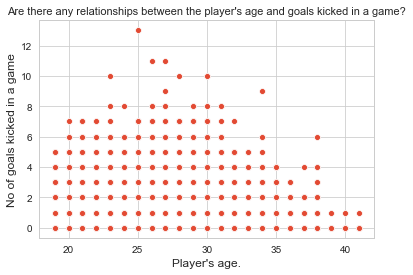

In [22]:
sns.set_style('whitegrid')
sns.scatterplot(x='age', y='goals', data=df)
plt.title("Are there any relationships between the player's age and goals kicked in a game?",fontdict={'fontsize': 11})
plt.xlabel("Player's age.")
plt.ylabel("No of goals kicked in a game")
plt.savefig('mini6_fig9.png', dpi=500)
plt.show()

Fig 10: Check where was player's field position most of the time?The defender comes first and then midfield and forward.

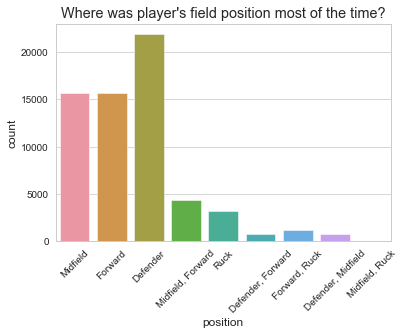

In [23]:
plt.xticks(rotation=45)
sns.countplot(x='position',data=df)
plt.title("Where was player's field position most of the time?")
plt.savefig('mini6_fig10.png', dpi=500)
plt.show()

groupby_1: Let's group by player and see how many games they played.

In [24]:
group_byplayer=df.groupby('player')['player'].size().reset_index(name='games_played')
top20_gamesplayed=group_byplayer.sort_values(by=['games_played'],ascending=False)[:25].copy()
top20_gamesplayed

,player,games_played
109,"Breust, Luke",168
576,"Kennedy, Josh P",166
1039,"Smith, Isaac",165
420,"Grundy, Heath",165
134,"Burgoyne, Shaun",161
854,"Parker, Luke",160
240,"Dangerfield, Patrick",160
619,"Lewis, Jordan",160
34,"Atley, Shaun",160
528,"Jacobs, Sam",160


groupby_2: Group by player & season and find total no of goals,disposals,kicks,marks,handballs,behinds,tackles and hitouts.This table is used later on to create interactive graph.

In [25]:
group_player=df.groupby(['player','season']).agg({'goals':np.sum,
                                                  'disposals':np.sum,
                                                  'kicks':np.sum,
                                                  'marks':np.sum,
                                                  'handballs':np.sum,
                                                  'behinds':np.sum,
                                                  'tackles':np.sum,
                                                  'hitouts':np.sum,
                                                 }
                                                ).reset_index()
group_goal_top_500=group_player.sort_values(by=['goals'],ascending=False)[:500].copy()

Fig 11. Player's key stats by season using interactive bokeh graph.
- When a player is selected from drop down lists ,total no of goals,disposals,kicks,marks,handballs,behinds,tackles and hitouts will be displayed by season in an interactive bar chart.

In [26]:
from bokeh.io import output_file, show, output_notebook 
from bokeh.models import ColumnDataSource,HoverTool, Select,Range1d
from bokeh.plotting import figure 
from bokeh.models import CustomJS 
from bokeh.layouts import row,column
output_notebook() 

df_full=group_player
df_filter=group_player[group_player['player']=='Kennedy, Josh J']

data_full=ColumnDataSource(data=df_full)
data_filter=ColumnDataSource(data=df_filter)


hover_tool1 = HoverTool(tooltips=[
            ('Goals', '@goals')],
            mode='vline'
        )
hover_tool2 = HoverTool(tooltips=[
            ('Disposals', '@disposals')],
            mode='vline'
        )

hover_tool3 = HoverTool(tooltips=[
            ('Kicks', '@kicks')],
            mode='vline'
        )
hover_tool4 = HoverTool(tooltips=[
            ('Marks', '@marks')],
            mode='vline'
        )

hover_tool5 = HoverTool(tooltips=[
            ('Handballs', '@handballs')],
            mode='vline'
        )
hover_tool6 = HoverTool(tooltips=[
            ('Behinds', '@behinds')],
            mode='vline'
        )

hover_tool7 = HoverTool(tooltips=[
            ('Tackles', '@tackles')],
            mode='vline'
        )
hover_tool8 = HoverTool(tooltips=[
            ('Hitouts', '@hitouts')],
            mode='vline'
        )

    

#plot and the dropdown is linked with each other by this callback function
callback = CustomJS(args=dict(source=data_full, sc=data_filter), code="""
var f = cb_obj.value
sc.data['season']=[]
sc.data['goals']=[]
sc.data['disposals']=[]
sc.data['kicks']=[]
sc.data['marks']=[]
sc.data['handballs']=[]
sc.data['behinds']=[]
sc.data['tackles']=[]
sc.data['hitouts']=[]


for(var i = 0; i <= source.get_length(); i++){
    if (source.data['player'][i] == f){
        sc.data['season'].push(source.data['season'][i])
        sc.data['goals'].push(source.data['goals'][i])
        sc.data['disposals'].push(source.data['disposals'][i])
        sc.data['kicks'].push(source.data['kicks'][i])
        sc.data['marks'].push(source.data['marks'][i])
       sc.data['handballs'].push(source.data['handballs'][i])
        sc.data['behinds'].push(source.data['behinds'][i])
        sc.data['tackles'].push(source.data['tackles'][i])
        sc.data['hitouts'].push(source.data['hitouts'][i])
        
     }
}   
   
sc.change.emit();
""")

dropdown1=Select(options=list(group_goal_top_500['player'].unique())
                 ,value='Kennedy, Josh J'
                 ,title='Please select a player')

p1=figure(plot_width=300, plot_height=350,x_axis_label='Year',y_axis_label='Total Goals',tools=[hover_tool1],title='Total goals by year')
p2=figure(plot_width=300, plot_height=350,x_axis_label='Year',y_axis_label='Total Disposals',tools=[hover_tool2],title='Total disposals by year')
p3=figure(plot_width=300, plot_height=350,x_axis_label='Year',y_axis_label='Total Kicks',tools=[hover_tool3],title='Total kicks by year')
p4=figure(plot_width=300, plot_height=350,x_axis_label='Year',y_axis_label='Total marks',tools=[hover_tool4],title='Total marks by year')
p5=figure(plot_width=300, plot_height=350,x_axis_label='Year',y_axis_label='Total handballs',tools=[hover_tool5],title='Total handballs by year')
p6=figure(plot_width=300, plot_height=350,x_axis_label='Year',y_axis_label='Total behinds',tools=[hover_tool6],title='Total behinds by year')
p7=figure(plot_width=300, plot_height=350,x_axis_label='Year',y_axis_label='Total tackles',tools=[hover_tool7],title='Total tackles by year')
p8=figure(plot_width=300, plot_height=350,x_axis_label='Year',y_axis_label='Total hitouts',tools=[hover_tool8],title='Total hitouts by year')

p1.vbar(x='season', top='goals', width=0.2,source=data_filter,fill_color='lightseagreen')
p2.vbar(x='season', top='disposals', width=0.2,source=data_filter,fill_color='lightslategray')
p3.vbar(x='season', top='kicks', width=0.2,source=data_filter)
p4.vbar(x='season', top='marks', width=0.2,source=data_filter,fill_color='darkcyan')
p5.vbar(x='season', top='handballs', width=0.2,source=data_filter)
p6.vbar(x='season', top='behinds', width=0.2,source=data_filter,fill_color='darkkhaki')
p7.vbar(x='season', top='tackles', width=0.2,source=data_filter,fill_color='olive')
p8.vbar(x='season', top='hitouts', width=0.2,source=data_filter,fill_color='darkgoldenrod')

dropdown1.js_on_change('value',callback)
layout1=column(row(dropdown1),row(p1,p2,p3,p4),row(p5,p6,p7,p8))
show(layout1)
output_file('bokehfig1.html')



Loading BokehJS ...

#### 5. Summary

This dataset helped to get more insights on AFL teams and player's performance.As data was in such  good condition not much cleaning was needed.Data were missing for West Coast & Collingwood QF-2018 and Melbourne & Geelong EF-2018 and it was replaced as per Wikipedia.A couple of unwanted columns are dropped and few new columns are added.

Exploratory data analysis was done by team and player and helped to answer a few questions and to find some correlation and trends during the season 2012 to 2018.

- Hawthorn won grand final thrice.
- Hawthorn won game most of the time followed by Sydney,Geelong,West Coast, and Adelaide
- The teams that scored lowest most of the times are Brisbane Lions,Gold Coast and Fremantle(note:Richmond got outlier,they might have a low score in one game or so.)
- The teams that sit on lists of the highest score are Adelaide,West Coast and Sydney(note:Hawthorn,Geelong and Richmond got few outliers)
- Hawthorn's average score is above 100 with 12 opponents.Hawthorn's lowest average score was with Richmond.
- The teams that never had an average score above 100 with opponents are Brisbase Lions,Carlton and Gold Coast.
- Geelong,Hawthorn, and Sydney are strong opponents(no team had an average score above 95 against them).
- The general trend shows, players kicked highest goals at the age of 23 to 31 and then it started decreasing(note: there were few outliers)




#### 6. Future Work

Still more to explore.It would be intresting to see more detailed analysis by player and also few predictions/modelling later on.

Few question for hypothesis tesing in future
1.  Is the team average score for Adelaide is truly 101.23?
       H0:µ0=101.23 
       HA:µ0?101.23
2.  Whether there is a significant difference between the team average score of Fremantle and Western Bulldogs?
3.  Team average score of Gold Coast and Carlton is signficantly less than other teams?
4.  Is there any dependancy between player's age and disposals in a game?
5.  is there any association between of average score of hawthorn in  season 2016 and season 2017?
